# Practical assignment 1
### Author details: MOFOKENG LS
### Author details: MOFOKENG TG
### Author details: MAKUOA B

#### Name and Surname: LEFU MOFOKENG
#### Student number: 36627399

#### Name and Surname: TEBOGO MOFOKENG
#### Student number: 35551178

#### Name and Surname: BEAUTY MAHUOA
#### Student number: 29898455

## Assignment:
Write an interactive python notebook (*.ipynb file) using Jupyter or Google CoLab to do the following:


1.  Demonstrate your inderstanding of Depth-first search and Breadth-first search.
2. In the notebook you should have Text sections to explain the different Code sections. Use the sections given below as starting point but feel free to add more sections in between or at the end.
3. Implement both algorithms in two ways: recursive (as given in the Ertel textbook) and iterative.
4.  Allow a user of your notebook to experiment with different input data for all the algorithms.








## Instructions for users of this notebook:


*   First, user have to read from file
*   If the file is not found,error will be encountered
*   To solve a file error, a user have to go to the left side of the notebook, there is menu, and click on file icon
*   There is dropdown arrow of "sample_data", after clicking the dropdown arrow
*   right click and then there is and menu that will pop up, then click **new file** and rename the file same name as of the name given in **createMaze()**, after double click to file and add input data to it and save it **(shortcut for save is ctr+v)**
*   For running the program the user have to start by running the library,then the code for finding the path (which consists valid() method:which is a boolean method use to check if the path is valid if path is valid return true else return false and findEnd() method:which is a boolean method use to find goal is exist return true else false),readfile (createMaze()), recursive method for DFS,iterative method for DFS, recursive method for BFS, iterative method BFS and last control for output(by using printMaze() method:which is used to print the maze if the path have been found and also iterative method DFS and BFS)   











## Background of the scenario being used in this assignment ...

The assignment is all about moving automated car  from starting state to the goal state, in a road that has holes and flat surface. For instance a car can move on a flat surface but cannot move in holes. The purpose of the assignment is to implement DFS and BFS (recursive and iterative) algorithims that will guide a car to go from starting point to the destination. Among them all the algorithims have to find a shortest path for a car to take.
The algorithim have check if the search space is not a hole if it is hole(H) the code have to restrict a car from taking the road.But if the path is "F", meaning it is flat surface a car can move.
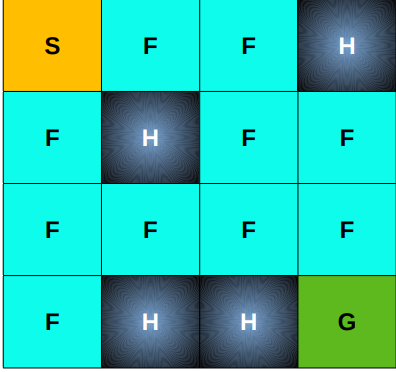


In [ ]:
import queue
from queue import Queue
from collections import deque
import networkx as nx


Below is a code use to find the path and evaluate if path is valid, if path is valid output the moves.
*   Function valid() is a boolean method use to check if the path is valid and return true if valid, else return false if is not valid
*   Function findEnd() is a boolean method the track the goal node if the goal is found true is return else false is return if the goal is not found


###Reference of code
[Path Finder Code](https://www.techwithtim.net/tutorials/breadth-first-search/)



In [ ]:
def valid(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "S":
            start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1
        elif move == "R":
            i += 1
        elif move == "U":
            j -= 1
        elif move == "D":
            j += 1

        if not(0 <= i < len(maze[0]) and 0 <= j < len(maze)):
            return False
        elif (maze[j][i] == " "):
            return False
    return True

def findEnd(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "S":
            start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1
        elif move == "R":
            i += 1
        elif move == "U":
            j -= 1
        elif move == "D":
            j += 1

    if maze[j][i] == "G":
        print("Found: " + moves)
        return True
    return False

### Step 1: Get the input data
Get started by declaring the input examples as "hard-coded" data structures in the next Code section

Reading from files

*   Give user instructions how to load files to let the program read from them

User have to go to the left side of the notebook, there is menu, and click on file icon.Then there is dropdown arrow of "sample_data", after clicking the dropdown arrow
right click and then there will be a menu that will pop up, then click new file and rename the file same name as it given in createMaze(), after double click to file and add input data to it and save it **(shortcut for save is ctr+v)**.


In [ ]:
def createMaze():
   file = open('given', 'r')
   newList = []
   j = 0
   f= file.readlines()
   for line in f:
     if line[-1]=="\n":
       newList.append(list(line[:-1]))
     else:
        newList.append(list(line))
   return newList

given_1 = createMaze()


### Recursive DFS
Explain the **recursive DFS** code and give reference(s) for where you got the algorithm or code from.

The recusive method is declared to recieve two paramater, one for nodes and one for goal node. And the goalfound() method is used to check if the goal is found if true return "solution found" if not assign successor method with newnodes.Successor method is a method that find next node to be evaluated and and store that to newnodes variable.While loop is use to loop through newnodes if there is still next to evaluate keep on looping if not terminate the loop and return if there is solution of not. The recursive call of DFS method is assign to variable results below the loop as to keep iterating to check if solution is found or not. The recursive call will keep on calling to check goalreached() if not assign next note to newnode and in recursive call, call the first() method that will return the first node in successor and test it if is the node is goal if not return to goalreach() method, until there is no successor nodes which while loop will terminate and return "solution found" if one exist or "no solution" if not exist.

In [ ]:
graph = nx.DiGraph()
def solveMaze(maze):
  numOfRow, numOfColumn = len(maze), len(maze[0])

  start = (0,0)
  for row in range(numOfRow):
    for column in range(numOfColumn):
      if maze[row][column] == 'S':
        start = (row, column)
        break
    else:
      continue
    break
  else:
    return None

  temp = 0
  tem = 0
  queue = deque()
  path = deque()
  coordinate = []
  edges = deque()
  shortPath = ''

  queue.appendleft((start[0], start[1], 0)) # 0-->distance
  directions = [[0,1],[0,-1], [1,0], [-1,0]] #right left up down
  visited = [[False] * numOfColumn for _ in range(numOfRow)]

  while len(queue) != 0:
    coord = queue.pop() # top coordinate
    coordinate.append((coord[0], coord[1]))
    visited[coord[0]][coord[1]] = True
    if maze[coord[0]][coord[1]] == "G":
      for i in path:
        shortPath += i
      return(coordinate)

    for dir in directions:
      nr,nc = coord[0] + dir[0], coord[1] + dir[1]
      if (nr < 0 or nr >= numOfRow or nc < 0 or nc >= numOfColumn or maze[nr][nc] == " " or visited[nr][nc]):
        continue

      if temp == nc and tem > nr:
        path.appendleft("L")
        temp = nc
        tem = nr
      elif temp == nc and tem < nr:
        path.appendleft("R")
        temp = nc
        tem = nr
      elif temp > nc and tem == nr:
        path.appendleft("U")
        temp = nc
        tem = nr
      elif temp < nc and tem == nr:
        path.appendleft("D")
        temp = nc
        tem = nr

      queue.appendleft((nr, nc, coord[2] + 1))

maze = createMaze()
mama = solveMaze(maze)
i = 0

def goalReached(node, goal):
  if node == goal:
    return True
  else:
    return False

def successor(node):
  global i
  momo = mama[i]
  if node == maze[momo[0]][momo[1]]:
    i += 1
    momo = mama[i]
    return(maze[momo[0]][momo[1]])

def Rest(Node):
  global i
  momo = mama[i]
  if Node == maze[momo[0]][momo[1]]:
    i -= 1
    momo = mama[i]
    return(maze[momo[0]][momo[1]])

def First(Node):
    Node =successor(Node)

def DEPTHFIRSTSEARCH(Node, Goal):
    if goalReached(Node, Goal):
      return("Solution found")
    NewNodes =  successor(Node)
    while NewNodes is not None:
      Result = DEPTHFIRSTSEARCH(First(NewNodes), Goal)
      if Result == "Solution found":
        return("Solution found")
      NewNodes = Rest(NewNodes)
      return("No solution")

DEPTHFIRSTSEARCH(maze[0][0], "G")

'No solution'

### Iterative DFS
Explain the **iterative DFS** code and give reference(s) for where you got the algorithm or code from.

This method uses stack, stack is LIFO(Last in, First out), but implementing it using queue and do the reverse of queue, meaning the opposite of the queue. In path finder code the conditions use an array that consists of ["L","R","U","D"], but in the method there is reverse elements of array ["D", "U", "R", "L"].This gives the algorithm to perform LIFO. Inside the method there is a declaration of queue and it assigned to variable called nums to hold stack of path. And then add empty value so that the stack cannot be empty.Also initializing "add" variable and set it to empty, that will keep track of moves.And assign input data(createMaze()) to variable "maze" which hold the array of input data. The use of while loop is to loop through the maze if the boolean value return from findEnd is not true until it reaches true. And the add variable is assign to the first value that is in queue which is empty value. The use of for loop is to loop strictly through the array ["D", "U", "R", "L"] and add the each itaration on variable put that will be use in valid function to check if path is valid. If is valid, add the search space to the stack. And loop until findEnd method return true.

###Reference of code
[Iterative DFS](https://www.techwithtim.net/tutorials/breadth-first-search/)

In [ ]:
def iterativeDFS():
   nums = queue.Queue()
   nums.put("")
   add = ""
   maze = createMaze()

   while not findEnd(maze, add):
      add = nums.get()
      for j in ["D", "U", "R", "L"]:
          put = add + j
          if valid(maze, put):
               nums.put(put)

print("Depth First Search Iterative Algorithm")
iterativeDFS()

Depth First Search Iterative Algorithm
Found: DDRRRD


### Recursive BFS
Explain the **recursive BFS** code and give reference(s) for where you got the algorithm or code from.

The method consists of BFS method that recieve two parameters, one for nodeList(list of nodes to be tested if they are goal or not) and goal node. And declaration of variable newNode that will hold next nodes to be evaluated. For loop is used to loop through newNodes until there is no node to be test. Then if the goalReached, method will return "solution found" plus the goal node.The main use for newNode variable is keep track of next nodes to be evaluated. The seccessors method use to keep track of next nodes and next nodes are store in newNodes variale.Conditional if statement is use to check if newNode is not empty, if not empty, recursively call the BFS method to evaluate next node. If newNodes are empty and the goal is not reached, return "no solution".

In [ ]:
def solveMaze(maze):
  numOfRow, numOfColumn = len(maze), len(maze[0])

  start = (0,0)
  for row in range(numOfRow):
    for column in range(numOfColumn):
      if maze[row][column] == 'S':
        start = (row, column)
        break
    else:
      continue
    break
  else:
    return None

  temp = 0
  tem = 0
  queue = deque()
  path = deque()
  coordinate = []
  edges = deque()
  shortPath = ''

  queue.appendleft((start[0], start[1], 0)) # 0-->distance
  directions = [[0,1],[0,-1], [1,0], [-1,0]] #right left up down
  visited = [[False] * numOfColumn for _ in range(numOfRow)]

  while len(queue) != 0:
    coord = queue.pop() # top coordinate
    coordinate.append((coord[0], coord[1]))
    visited[coord[0]][coord[1]] = True
    if maze[coord[0]][coord[1]] == "G":
      for i in path:
        shortPath += i
      return(coordinate)

    for dir in directions:
      nr,nc = coord[0] + dir[0], coord[1] + dir[1]
      if (nr < 0 or nr >= numOfRow or nc < 0 or nc >= numOfColumn or maze[nr][nc] == " " or visited[nr][nc]):
        continue

      if temp == nc and tem > nr:
        path.appendleft("L")
        temp = nc
        tem = nr
      elif temp == nc and tem < nr:
        path.appendleft("R")
        temp = nc
        tem = nr
      elif temp > nc and tem == nr:
        path.appendleft("U")
        temp = nc
        tem = nr
      elif temp < nc and tem == nr:
        path.appendleft("D")
        temp = nc
        tem = nr

      queue.appendleft((nr, nc, coord[2] + 1))

maze = createMaze()
mama = solveMaze(maze)
i = 0

def goalReached(node, goal):
  if node == goal:
    return True
  else:
    return False

def Successors(node):
  global i
  momo = mama[i]
  if node == maze[momo[0]][momo[1]]:
    i += 1
    momo = mama[i]
    return(maze[momo[0]][momo[1]])


def BREADTHFIRSTSEARCH(nodeList, goal):
  newNode = " "
  for node in nodeList:
    if goalReached(node, goal):
      return("Solution found", node)
    newNode = Successors(node)
    #print(newNode, goal)

    if newNode is not None:
      return(BREADTHFIRSTSEARCH(newNode, goal))
    else:
        return("No Solution")
BREADTHFIRSTSEARCH(maze[0][0], "G")

('Solution found', 'G')

###Iterative BFS

Explain the **iterative** BFS code and give reference(s) for where you got the algorithm or code from.

This method uses queue, queue is FIFO(First in, First out), and it is implemented using queue in oder to perform FIFO. In path finder code the conditions use an array that consists of ["L","R","U","D"], and in the method there is array of elements that is:["L","R","U","D"].This gives the algorithm to perform FIFO. Inside the method there is a declaration of queue and it assigned to variable called nums to hold stack of queue. And then add empty value so that the queue cannot be empty.Also initializing "add" variable and set it to empty, that will keep track of moves.And assign input data(createMaze()) to variable "maze" which hold the array of input data. The use of while loop is to loop through the maze if the boolean value return from findEnd is not true until it reaches true. And the add variable is assign to the first value that is in queue which is empty value. The use of for loop is to loop strictly through the array ["D", "U", "R", "L"] and add the each itaration on variable put that will be use in valid function to check if path is valid. If is valid, add the search space to the queue. And loop until findEnd method return true.


###Reference of code
[Iterative BFS](https://www.techwithtim.net/tutorials/breadth-first-search/)

In [ ]:
def iterativeBFS():
  nums = queue.Queue()
  nums.put("")
  add = ""
  maze  = createMaze()

  while not findEnd(maze, add):
      add = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = add + j
          if valid(maze, put):
              nums.put(put)

print("Breadth First Search Iterative Algorithm")
iterativeBFS()

Breadth First Search Iterative Algorithm
Found: RRDRDD


### Control
Allow the user to select / switch on and of the displaying of output when the algorithms are run.

 * The input example(s) - previously read from files and now being used
 * Graphs of the state space as it develops while the algorithms constructs it  (use graphviz)
 * Other useful interactive output
 * Should output be saved somewhere for later reference?

###Reference of code
[Print Output](https://www.techwithtim.net/tutorials/breadth-first-search/)

In [ ]:
def printMaze(maze, path="#"):
    for x, pos in enumerate(maze[0]):
        if pos == "S":
            start = x
    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1
        elif move == "R":
            i += 1
        elif move == "U":
            j -= 1
        elif move == "D":
            j += 1
        pos.add((j, i))
    for j, row in enumerate(maze):
        for i, col in enumerate(row):
            if (j, i) in pos:
                print("+ ", end="")
            else:
                if col== " ":
                  print("0 ", end="")

                elif col== "#":
                  print("1 ", end="")
                else:
                  print(col + " ", end="")

        print()


def findEnd(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "S":
            start = x
    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1
        elif move == "R":
            i += 1
        elif move == "U":
            j -= 1
        elif move == "D":
            j += 1

    if maze[j][i] == "G":
        printMaze(maze, moves)
        return True
    return False
def iterativeBFS():
  nums = queue.Queue()
  nums.put("")
  add = ""
  maze  = createMaze()

  while not findEnd(maze, add):
      add = nums.get()
      for j in ["L", "R", "U", "D"]:
          put = add + j
          if valid(maze, put):
              nums.put(put)

print("Breadth First Search State Space")
iterativeBFS()
def iterativeDFS():
   nums = queue.Queue()
   nums.put("")
   add = ""
   maze = createMaze()

   while not findEnd(maze, add):
      add = nums.get()
      for j in ["D", "U", "R", "L"]:
          put = add + j
          if valid(maze, put):
               nums.put(put)
print("\n\n")
print("Depth First Search State Space")
iterativeDFS()

Breadth First Search State Space
S + + 0 
1 0 + + 
1 1 1 + 
1 0 0 + 



Depth First Search State Space
S 1 1 0 
+ 0 1 1 
+ + + + 
1 0 0 + 


### Comparison
Show (e.g. in tables) how the algorithms compare in terms of
* efficiency (number of nodes visited, size of data structures required, etc.)
1.  BFS(Breadth First Search) uses Queue data structure for
finding the shortest path. DFS(Depth First Search) uses Stack data structure.
2.	BFS can be used to find single source shortest path in an unweighted graph, because in BFS, we reach a vertex with minimum number of edges from a source vertex.	In DFS, we might traverse through more edges to reach a destination vertex from a source.
3.	BFS is more suitable for searching vertices which are closer to the given source.	DFS is more suitable when there are solutions away from source.
4.	BFS considers all neighbors first and therefore not suitable for decision making trees used in games or puzzles.	DFS is more suitable for game or puzzle problems. We make a decision, then explore all paths through this decision. And if this decision leads to win situation, we stop.
5.	The Time complexity of BFS is O(V + E) when Adjacency List is used and O(V^2) when Adjacency Matrix is used, where V stands for vertices and E stands for edges.	The Time complexity of DFS is also O(V + E) when Adjacency List is used and O(V^2) when Adjacency Matrix is used, where V stands for vertices and E stands for edges.
6.	Here, siblings are visited before the children	Here, children are visited before the siblings
7.	In BFS there is no concept of backtracking. 	DFS algorithm is a recursive algorithm that uses the idea of backtracking
8.	BFS is used in various application such as  bipartite graph, and shortest path etc.	DFS is used in various application such as acyclic graph and topological order etc.
9.	BFS requires more memory. 	DFS requires less memory.
* effectiveness (Did it find a solution? Was it optimal?)


BFS it is optimal and complete, also it find the solution if one exist and above problem, it has find the path and it is optimal and short while DFS it is not optimal and not complete. Meaning it take time to find the solution and it might end up in infinite loop as always it explore the left child of the tree meaning if the goal is not the left child it will end up in infinite loop unless it do backtracking to go and explore other nodes, it find solution if one exist but it is not optimal. In above problem it has find the solution and the solution is optimal
